In [143]:
import numpy as np
import matplotlib.pyplot as plt
import tabulate

from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score #доля правильных ответов в классификации
from sklearn.metrics import mean_squared_error

Загрузим данные датасета с ирисами из библиотеки Sklearn.

In [144]:
iris = datasets.load_iris()

Получим массив данных и меток классов. Отфильтруем данные только двух классов: Iris Versicolor, Iris Virginica.

In [145]:
X = iris.data
y = iris.target

X = iris.data[iris.target != 0]
y = iris.target[iris.target != 0]

Посмотрим зависимости значений таргетной переменной Y от разных атрибутов переменной X на диаграммах рассеяния.

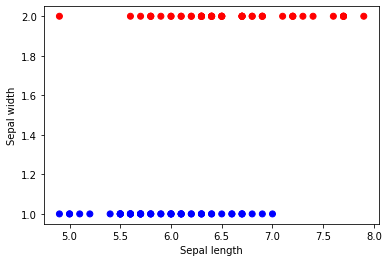

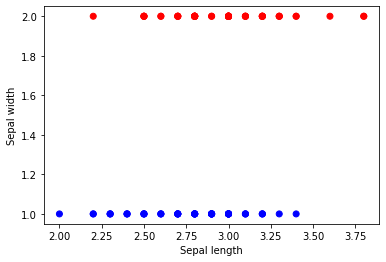

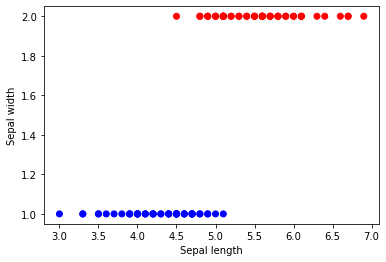

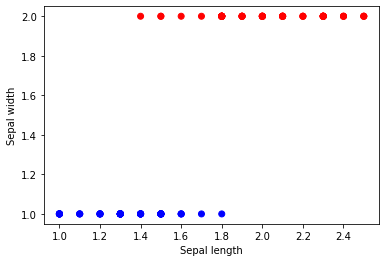

In [146]:
colors = ['red' if i in versicolor_indices else 'blue' for i in range(len(X))]

plt.scatter(X[:, 0], y, c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

plt.scatter(X[:, 1], y, c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

plt.scatter(X[:, 2], y, c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

plt.scatter(X[:, 3], y, c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

Разделим данные на тренировочную и тестовую выборки.

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Создадим класс для реализации логистической регрессии.

In [148]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression:
    def __init__(self, lr=0.01, n_iterations=1000):
        self.lr = lr
        self.n_iterations = n_iterations

    def fit(self, X, y):
        # Предположим, что у нас есть два класса (0 и 1), поэтому w будет двумерным
        self.w = np.zeros(X.shape[1])

        for _ in range(self.n_iterations):
            z = np.dot(X, self.w)
            p = sigmoid(z)
            error = y - p
            self.w += self.lr  *  np.dot(error.T, X)

    def predict(self, X):
        z = np.dot(X, self.w)
        p = sigmoid(z)
        return p

Реализуем лигистическую регрессию через созданный класс.

In [149]:
model = LogisticRegression()

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_train)

# Вывод вектора весов
print(model.w)

[-1.66133181 -2.40359696  6.3530816   5.66810097]


Определим функцию для реализации метода градиентного спуска.

In [160]:
# Нормализация данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Реализация логистической регрессии с градиентным спуском
def logistic_regression_gradient_descent(X, y, lr=0.01, n_iterations=1000):
    # Предположим, что у нас есть два класса (0 и 1), поэтому w будет двумерным
    w = np.zeros(X.shape[1])
    
    for _ in range(n_iterations):
        z = np.dot(X, w)
        p = 1 / (1 + np.exp(-z))
        error = y - p
        w += lr  *  np.dot(error.T, X)
    
    return w

Обучим логистическую регрессию и посчитаем метрику качества MSE.

In [169]:
# Обучение модели
w = logistic_regression_gradient_descent(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = 1 / (1 + np.exp(-np.dot(X_test, w)))

# Вычисление метрики качества SSE (Sum of Squared Errors)
mse_1 = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse_1}")

MSE: 1.0622171303892813


Определим функцию для реализации метода скользящего среднего.

In [163]:
import numpy as np

def rmsprop(X, y, w, lr=0.01, decay_rate=0.9, epsilon=1e-8):
    """Реализация алгоритма RMSProp."""
    n_samples, n_features = X.shape
    grad = np.zeros(n_features)
    cache = np.ones(n_features)
    
    for i in range(n_samples):
        z = np.dot(X[i], w)
        p = 1 / (1 + np.exp(-z))
        error = y[i] - p
        grad += error  *  X[i]
        cache  *= decay_rate
        cache += (1 - decay_rate)  *  (error  **  2)
        w -= lr  *  grad / (np.sqrt(cache) + epsilon)
    
    return w

Обучим логистическую регрессию и посчитаем метрику качества MSE.

In [170]:
w = np.zeros(X_train.shape[1])
w = rmsprop(X_train, y_train, w)

# Прогнозирование на тестовой выборке
y_pred = 1 / (1 + np.exp(-np.dot(X_test, w)))

# Вычисление метрики качества SSE (Sum of Squared Errors)
mse_2 = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse_2}")

MSE: 1.1235708845923063


Определим функцию для реализации ускоренного по Нестерову метода адаптивной оценки моментов.

In [165]:
import numpy as np

def nadam(X, y, w, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """Реализация алгоритма Nadam."""
    n_samples, n_features = X.shape
    m = np.zeros(n_features)
    v = np.zeros(n_features)
    
    for i in range(n_samples):
        z = np.dot(X[i], w)
        p = 1 / (1 + np.exp(-z))
        error = y[i] - p
        m_t = beta1  *  m + (1 - beta1)  *  error
        v_t = beta2  *  v + (1 - beta2)  *  (error ** 2)
        m_corr = m_t / (1 - beta1 ** (i+1))
        v_corr = v_t / (1 - beta2 ** (i+1))
        
        w -= lr  *  (m_corr + (beta1  *  m_corr) / (1 - beta1  **  (i+1))) / (np.sqrt(v_corr) + epsilon)
    
    return w

Обучим логистическую регрессию и посчитаем метрику качества MSE.

In [171]:
w = np.zeros(X_train.shape[1])
w = nadam(X_train, y_train, w)

# Прогнозирование на тестовой выборке
y_pred = 1 / (1 + np.exp(-np.dot(X_test, w)))

# Вычисление метрики качества SSE (Sum of Squared Errors)
mse_3 = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse_3}")

MSE: 1.043658499390455


Оценим полученный результат.

In [190]:
# Создаём список с данными для таблицы
data = [['Метод обучения', 'MSE'],
        ['Градиентного спуска', mse_1],
        ['Скользящего среднего', mse_2],
        ['Адаптивной оценки моментов по Нестерову', mse_3]]

# Форматируем таблицу
table = tabulate.tabulate(data, headers='firstrow', tablefmt='grid')

# Выводим таблицу
print(table)

data = pd.DataFrame(data, columns=['Метод обучения', 'MSE'])
data = data.drop(data.index[0], axis=0)
data['MSE'] = data['MSE'].astype('float')

max_index = data['MSE'].idxmax()

print(f"Наилучший результат по метрике качества MSE показал метод {data.loc[data['MSE'].idxmax(), 'Метод обучения']}.")


+-----------------------------------------+---------+
| Метод обучения                          |     MSE |
+=========================================+=========+
| Градиентного спуска                     | 1.06222 |
+-----------------------------------------+---------+
| Скользящего среднего                    | 1.12357 |
+-----------------------------------------+---------+
| Адаптивной оценки моментов по Нестерову | 1.04366 |
+-----------------------------------------+---------+
Наилучший результат по метрике качества MSE показал метод Скользящего среднего.
